## Chebyshev's Inequality

In probability, **Chebyshev’s Inequality**, also known as “Bienayme-Chebyshev” Inequality guarantees that, for a wide class of probability distributions, only a definite fraction of values will be found within a specific distance from the mean of a distribution.

Chebyshev’s inequality is similar to The Empirical rule(68-95-99.7); however, the latter rule only applies to normal distributions. Chebyshev’s inequality is broader; it can be applied to any distribution so long as the distribution includes a defined variance and mean.


So Chebyshev’s inequality says that at least (1-1/k^2) of data from a sample must fall within K standard deviations from the mean (or equivalently, no more than 1/k^2 of the distribution’s values can be more than k standard deviations away from the mean).

Where K --> Positive real number


If the data is not normally distributed then different amounts of data could be in one standard deviation. Chebyshev’s inequality provides a way to know what fraction of data falls within K standard deviations from the mean for any data distribution.

**Create a population of 1,000,000 values, I use a gamma distribution(also works with other distributions) with shape = 2 and scale = 2.**

In [5]:
import numpy as np
import random
import matplotlib.pyplot as plt

#create a population with a gamma distribution
shape, scale = 2., 2.  #mean=4, std=2*sqrt(2)
mu = shape*scale #mean and standard deviation
sigma = scale*np.sqrt(shape)

s = np.random.gamma(shape, scale, 1000000)

Now sample 10,000 values from the population.


In [6]:
#sample 10000 values
rs = random.choices(s, k=10000)

Count the sample that has a distance from the expected value larger than k standard deviation and use the count to calculate the probabilities. I want to depict a trend of probabilities when k is increasing, so I use a range of k from 0.1 to 3.

In [7]:
#set k
ks = [0.1,0.5,1.0,1.5,2.0,2.5,3.0]

#probability list
probs = [] #for each k

for k in ks: 
    #start count
    c = 0
    for i in rs:
        # count if far from mean in k standard deviation
        if abs(i - mu) > k * sigma :
            c += 1
    probs.append(c/10000)


Probability of a sample far from mean more than k standard deviation:
k:0.1, probability: 0.923 | in theory, probability should less than: 99.99
k:0.5, probability: 0.614 | in theory, probability should less than: 4.0
k:1.0, probability: 0.262 | in theory, probability should less than: 1.0
k:1.5, probability: 0.087 | in theory, probability should less than: 0.444
k:2.0, probability: 0.046 | in theory, probability should less than: 0.25
k:2.5, probability: 0.027 | in theory, probability should less than: 0.16
k:3.0, probability: 0.013 | in theory, probability should less than: 0.111


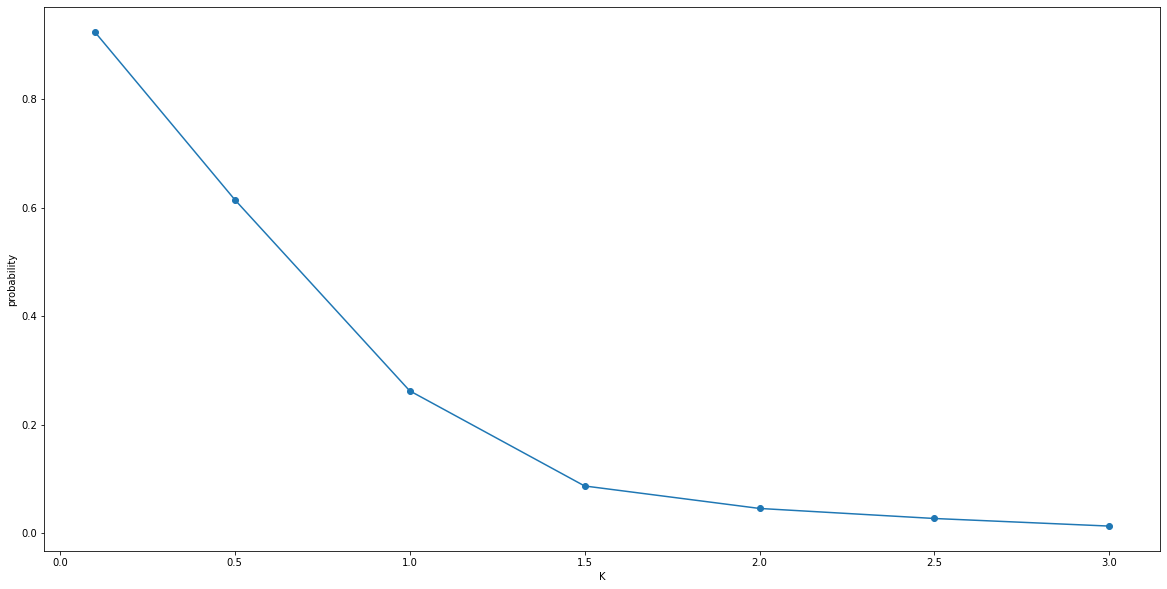

In [8]:
plot = plt.figure(figsize=(20,10))
#plot each probability
plt.xlabel('K')
plt.ylabel('probability')
plt.plot(ks,probs, marker='o')
plot.show()
#print each probability
print("Probability of a sample far from mean more than k standard deviation:")
for i, prob in enumerate(probs):
    print("k:" + str(ks[i]) + ", probability: " \
          + str(prob)[0:5] + \
          " | in theory, probability should less than: " \
          + str(1/ks[i]**2)[0:5])

From the above plot and result, we can see that as the k increases, the probability is decreasing, and the probability of each k follows the inequality. Moreover, only the case that k is larger than 1 is useful. If k is less than 1, the right side of the inequality is larger than 1 which is not useful because the probability cannot be larger than 1.